In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sqlalchemy import create_engine
import pandas as pd

In [26]:
engine = create_engine('sqlite:///../RBpipeline/rbogus-dev.db')

In [68]:
und_p = pd.read_sql_query("""SELECT * FROM Simulated INNER JOIN Undetected 
                          ON Simulated.id==Undetected.simulated_id""", 
                          engine)

In [69]:
und_b = pd.read_sql_query("""SELECT * FROM Simulated INNER JOIN UndetectedOIS 
                          ON Simulated.id==UndetectedOIS.simulated_id""", 
                          engine)

In [55]:
dt_ois = pd.read_sql_table('DetectedOIS', engine)
dt_zps = pd.read_sql_table('Detected', engine)

In [60]:
dt_ois.IS_REAL = dt_ois.IS_REAL.astype(int)
dt_zps.IS_REAL = dt_zps.IS_REAL.astype(int)

In [75]:
ois = [sum(dt_ois.IS_REAL), len(dt_ois.IS_REAL)-sum(dt_ois.IS_REAL), len(und_b)]
zps = [sum(dt_zps.IS_REAL), len(dt_zps.IS_REAL)-sum(dt_zps.IS_REAL), len(und_p)]
df2 = pd.DataFrame([zps, ois], columns=['Real', 'Bogus', 'False Neg'])

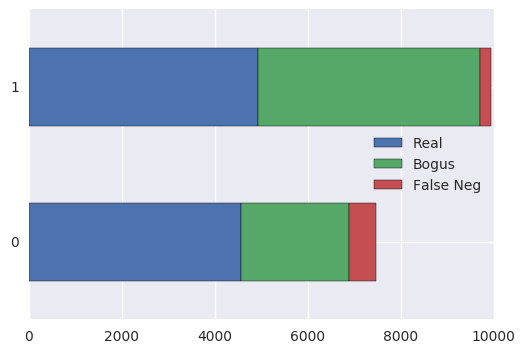

In [79]:
df2.plot.barh(stacked=True)